In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [5]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [6]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [7]:
model = SVC(probability=True).fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

In [8]:
import os
os.makedirs('figures', exist_ok=True)
os.makedirs('excel_files', exist_ok=True)

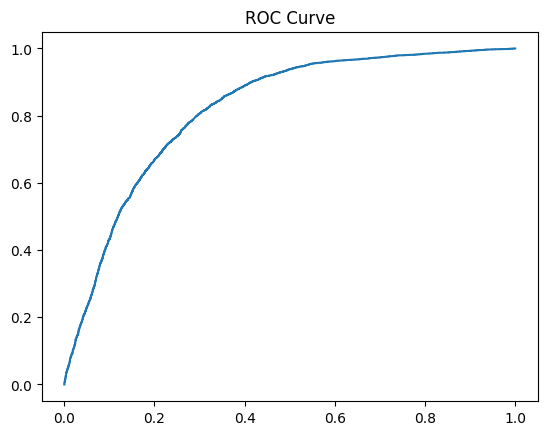

In [9]:
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.savefig('figures/diabetes_roc.png')
plt.show()

In [10]:
auc = roc_auc_score(y_test, probs)
with pd.ExcelWriter('excel_files/diabetes_svm.xlsx') as writer:
    pd.DataFrame({'Probs': probs}).to_excel(writer, sheet_name='Scores')
    pd.DataFrame({'AUC': [auc]}).to_excel(writer, sheet_name='Metrics')